In [1]:
# Add the shared code directory to the module search path
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir, 'shared_code')))

from pauli_channel_approximation import PCA

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
import dill
data = {'sparsity':{}, 'agi':{}}
sample_values = [0,'1e-15','1e-10', '1e-07', '1e-06', '5e-07', '1e-05', '0.001']
sample_values = [0, '0.001','0.0001', '0.005', '0.0005', '0.00025', '0.000125', '6.25e-05', '9.375e-05', '7.8125e-05']
sample_values = [0,'6.25e-05', '0.0001', '0.00025', '0.0005']
for ind, eta in enumerate(sample_values):
    with open(f'sparsity{eta}.pkl', 'rb') as f:
        data['sparsity'][eta] = dill.load(f)
    with open(f'agi{ind}.pkl', 'rb') as f:
        data['agi'][eta] = dill.load(f)

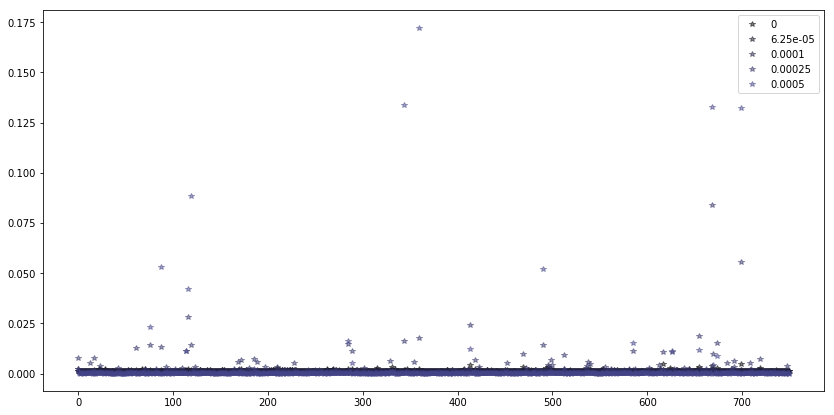

In [4]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate(sample_values):
    plt.plot(np.arange(750), data['agi'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

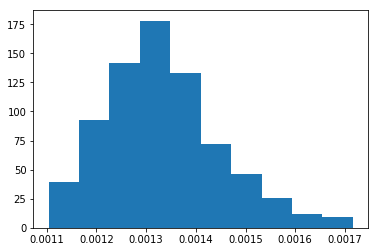

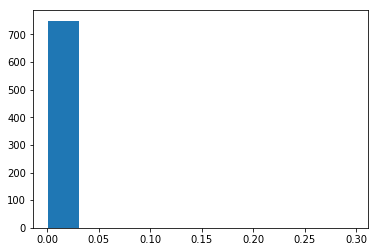

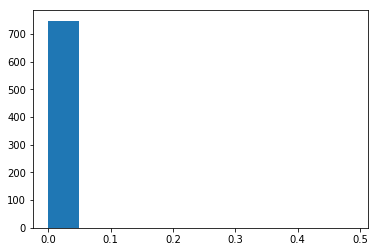

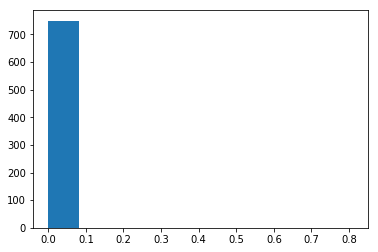

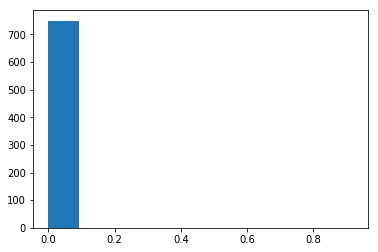

In [5]:
for ind,eta in enumerate(sample_values):
    plt.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    plt.show()

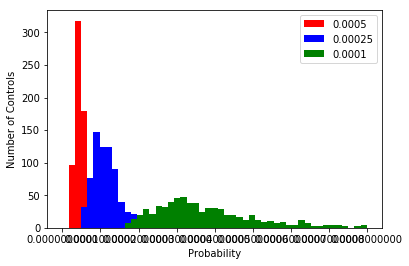

In [6]:
from matplotlib.ticker import FormatStrFormatter, ScalarFormatter
fig, ax = plt.subplots()
colors = ['r','b','g','y','k','m','c', 'r']
for ind,eta in enumerate(sample_values[:1:-1]):
    ax.hist(data['sparsity'][eta]['weights'][1].T.tolist()[0], color=colors[ind], label=eta,
           bins=np.linspace(0,.0008,50))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.10f'))
plt.legend()
plt.ylabel("Number of Controls")
plt.xlabel('Probability')
plt.savefig("sparisity-versus-parameter.png")
plt.show()

In [7]:
sample_values

[0, '6.25e-05', '0.0001', '0.00025', '0.0005']

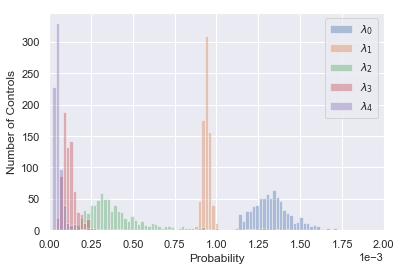

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=True)
lim = .002
for ind,eta in enumerate(sample_values):
    ax = sns.distplot(data['sparsity'][eta]['weights'][1].T.tolist()[0], bins=np.linspace(0,lim,100), label=f"$\lambda_{ind}$", kde=False)
    #ax.xaxis.set_major_formatter(FormatStrFormatter('%.2F'))
    #ax.xaxis.set_major_formatter(ScalarFormatter())
    ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')
    ax.set_xlim(0,lim)
plt.legend()
plt.ylabel("Number of Controls")
plt.xlabel("Probability")
plt.savefig("sparisity-versus-parameter.png", dpi=500)

## Making a new sparsity plot

In [34]:
print('{:.3g}'.format(10.1827468172))

10.2


In [62]:
[np.sqrt(np.mean(np.array(data['sparsity'][eta]['weights'][1].T.tolist()[0])**2)) for eta in sample_values]

[0.001338299971197998,
 0.010873166256491422,
 0.018859877811786722,
 0.029666500122697677,
 0.03356196339697401]

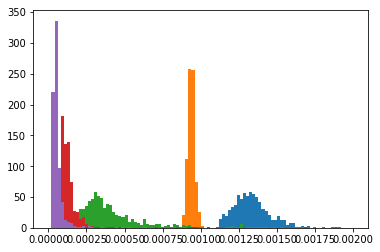

In [85]:
for ind, eta in enumerate(sample_values):
    local_data = np.array(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    plt.hist(local_data, 100, range=(0,2.e-3))
#     plt.xlim(-.1,1.1)
#     plt.ylim(0,1)
    plt.show()

In [82]:
plt.hist?

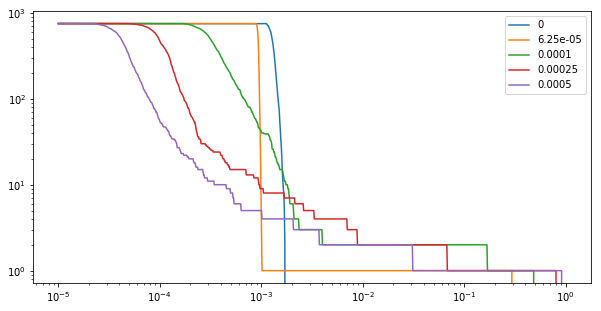

In [126]:
plt.figure(figsize=(10,5))
ks = np.logspace(-5,0,1000)
vals = np.array([[sum(np.array(data['sparsity'][eta]['weights'][1].T.tolist()[0]) > k) for eta in sample_values] for k in ks])
for val, eta in zip(vals.T, sample_values):
    plt.loglog(ks,val, label=str(eta) )
plt.legend()

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
sns.set(color_codes=False, style='white')

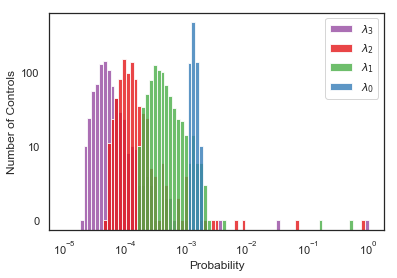

In [33]:
svs = [0, '0.0001', '0.00025', '0.0005']
# plt.figure(figsize=(10,6))
# for ind,eta in enumerate(sample_values):


colors = ['#377eb8','#4daf4a','#e41a1c','#984ea3']

for ind in reversed(range(len(svs))):
# for ind,eta in enumerate(svs):
    eta = svs[ind]
    ax = sns.distplot(data['sparsity'][eta]['weights'][1].T.tolist()[0], 
                      np.logspace(-5,0,80), label=f"$\lambda_{ind}$", kde=False,
                      color = colors[ind], hist_kws=dict(alpha=.81))
ax.set_xscale("log")    
ax.set_yscale("log")
plt.legend()
ax.set_yticklabels(['','','0','10','100', '1000'])
plt.ylabel("Number of Controls")
plt.xlabel("Probability")
plt.savefig("sparisity-versus-parameter_kcy.png", dpi=500)



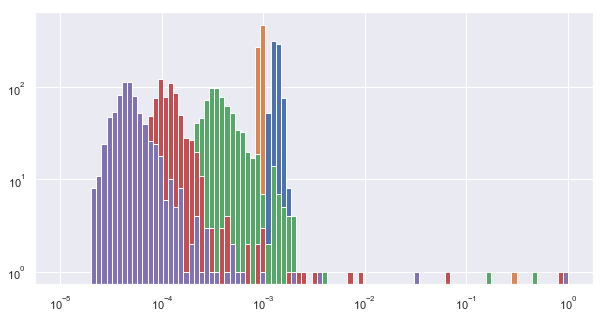

In [10]:

plt.figure(figsize=(10,5))
ks = np.logspace(-5,0,100)
for eta in sample_values:
    vals = np.array(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    plt.hist(vals, bins = ks)
plt.gca().set_xscale("log")    
plt.gca().set_yscale("log")    

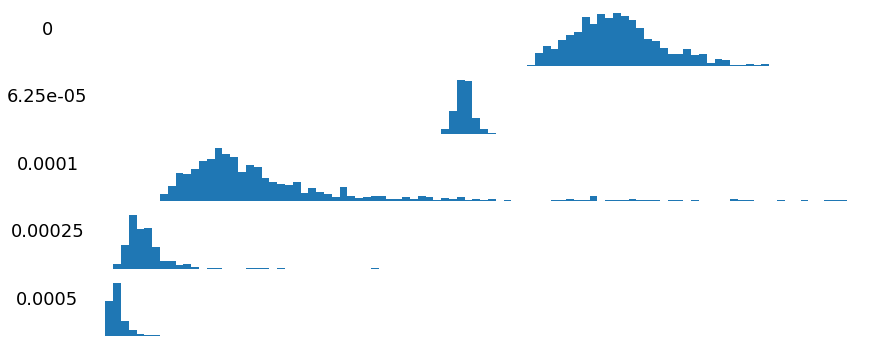

In [87]:
cm = plt.get_cmap('viridis')

fig, ax = plt.subplots(nrows=len(sample_values), sharex=True, figsize=(14,6))
for ind, eta in enumerate(sample_values):
    local_data = np.array(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    ax[ind].hist(local_data, 100, range=(0,2.e-3))
#     ax[ind].set_xlim(0,1)
#     ax[ind].set_ylim(0,10)
#     for indx, datum in enumerate(local_data):
#         cdatum = 1+np.log(datum)/11
#         cdatum = datum
#         cdatum = 1-(1-datum)**4
#         ax[ind].axvline(indx, color=cm(cdatum), alpha=1, linewidth=2)
    ax[ind].set_ylabel('{:.3g}'.format(float(eta)), rotation=0, fontsize=18, labelpad=50)
#     ax[ind].set_facecolor('black')
    for spine in ax[ind].spines.values():
        spine.set_visible(False)
    ax[ind].tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        left=False,
        labelleft=False)


plt.xlim(0,2.e-3)
plt.savefig('sparsity2_KCY.pdf')

In [92]:
[1./float(val) for val in sample_values if float(val) > 0]

[16000.0, 10000.0, 4000.0, 2000.0]

In [88]:
1./6.25e-5

16000.0

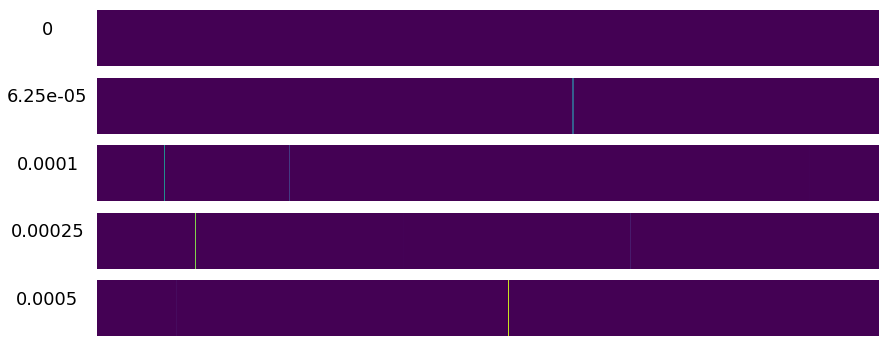

In [51]:
cm = plt.get_cmap('viridis')

fig, ax = plt.subplots(nrows=len(sample_values), sharex=True, figsize=(14,6))
for ind, eta in enumerate(sample_values):
    local_data = np.array(data['sparsity'][eta]['weights'][1].T.tolist()[0])
    for indx, datum in enumerate(local_data):
#         cdatum = 1+np.log(datum)/11
        cdatum = datum
#         cdatum = 1-(1-datum)**4
        ax[ind].axvline(indx, color=cm(cdatum), alpha=1, linewidth=2)
    ax[ind].set_ylabel('{:.3g}'.format(float(eta)), rotation=0, fontsize=18, labelpad=50)
    ax[ind].set_facecolor('black')
    for spine in ax[ind].spines.values():
        spine.set_visible(False)
    ax[ind].tick_params(
        axis='both',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False,
        left=False,
        labelleft=False)


plt.xlim(0,750)
plt.savefig('sparsity_KCY.pdf')

In [20]:
plt.tick_params?

### old

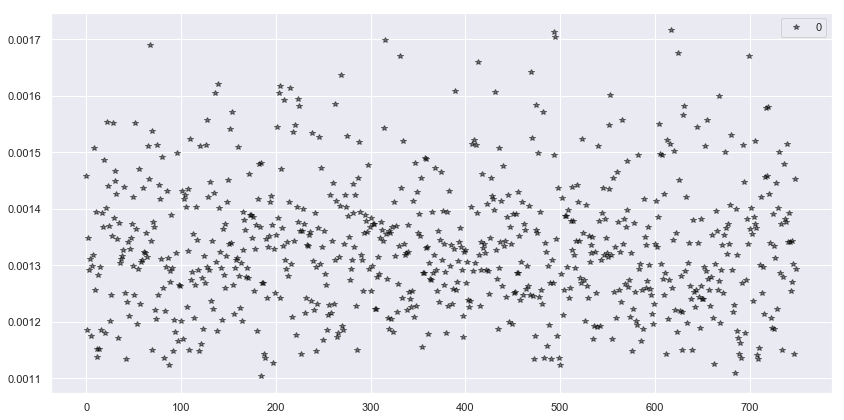

In [9]:
plt.figure(figsize=(14,7))
for ind,eta in enumerate([0]):
    plt.plot(np.arange(750), data['sparsity'][eta]['weights'][1].T.tolist()[0], 
             '*', color=f'#{ind}{ind}{ind}{ind}{2*ind}{2*ind}', alpha=.5, label=eta)
plt.legend()

In [10]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['agi'][eta]['weights'][0].T.tolist()[0])
    print(data['agi'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0.005 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.01 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.1 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]


In [11]:
for ind,eta in enumerate(sample_values):
    weights = np.array(data['sparsity'][eta]['weights'][0].T.tolist()[0])
    print(data['sparsity'][eta]['param'], list(zip(np.round(weights[weights>0.02],3), np.where(weights > 0.02)[0])))
    

0 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
6.25e-05 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0001 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.00025 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
0.0005 [(0.065, 61), (0.484, 112), (0.108, 203), (0.25, 301), (0.093, 669)]
